# Classification_HR_data
#### 2024.08.04
#### Chulwon Chae

###  Purpose of Data Analysis 
    - Utilize employee profile data to determine whether an employee is likely to leave the company in the future.
    - This determination aims to prevent work gaps and improve operational efficiency.


In [44]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Image
from datetime import datetime
from ydata_profiling import ProfileReport

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

from statsmodels.stats.outliers_influence import variance_inflation_factor

# library for sampling 
from imblearn.combine import SMOTEENN

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from xgboost import XGBClassifier
from xgboost import plot_importance

## 1. Data Processing 1 

### 1-1 Data Load 

In [45]:
df = pd.read_csv('./data/6.Classification_HR/HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [46]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### 1-2 Duplicated Data

In [47]:
print('Number of Duplicated : ', len(df[df.duplicated()]))

Number of Duplicated :  0


## 2. Data EDA

### 2-1 Data Type and Summary

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [49]:
# categorical and numeric columns
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique())

Age int64 [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition object ['Yes' 'No']
BusinessTravel object ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate int64 [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 139

In [50]:
# categorical -> object
# numeric -> int64

list_casting_as_object =["Education","EmployeeNumber","EnvironmentSatisfaction","JobInvolvement","JobLevel","JobSatisfaction","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance"]
for column_name in list_casting_as_object:
    df[column_name] = df[column_name].astype('object')

In [51]:
list_categorical_columns = list(df.select_dtypes(include=['object']).columns)
list_numeric_columns = list(df.select_dtypes(include=['int64']).columns)
target_column = 'Attrition'
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

35
19
16


#### Summary of Data Set
##### - Number of Variables : 35
    categorical variables : 19 (target incl.)
    numeric variables : 16
##### - Number of observations : 1470
##### - Missing Cells : 0 columns
##### - Duplicated Rows : 0 

### 2-2 Dependent Data Explore

<Axes: xlabel='Attrition', ylabel='count'>

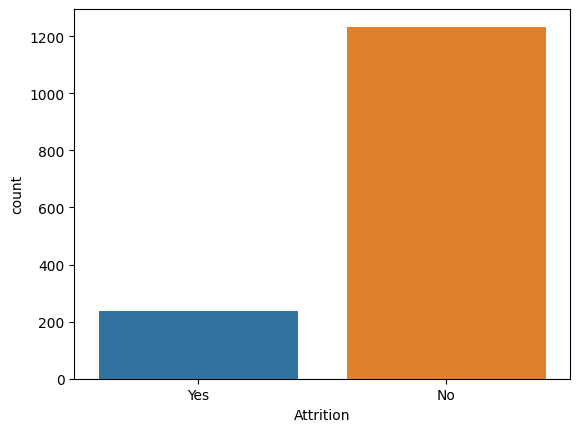

In [52]:
sns.countplot(x=target_column, data=df)

#### Imbalanced Data Set?
    - There is a difference in the proportion of the two target classes. If the independent variables include categorical data, one-hot encoding should be performed before sampling.
    - If the data with "Yes" attrition has significant data distribution and characteristics, the model may learn well without additional sampling.
    - During ML training, cost-sensitive methods (such as class weights) can be utilized.

### 2-3 Independent Data Explore

#### 1) Categorical Data Analysis

In [53]:
list_categorical_columns.remove(target_column)

Removing Unnecessary Columns

In [54]:
df[list_categorical_columns].nunique().sort_values()

Over18                         1
PerformanceRating              2
OverTime                       2
Gender                         2
BusinessTravel                 3
Department                     3
MaritalStatus                  3
RelationshipSatisfaction       4
JobSatisfaction                4
WorkLifeBalance                4
StockOptionLevel               4
JobInvolvement                 4
EnvironmentSatisfaction        4
Education                      5
JobLevel                       5
EducationField                 6
JobRole                        9
EmployeeNumber              1470
dtype: int64

In [55]:
# Over18 should be deleted; one unique value
# EmployeeNumber should be deleted; is unique ID

df = df.drop(["Over18", "EmployeeNumber"], axis=1).copy()
list_categorical_columns.remove("Over18")
list_categorical_columns.remove("EmployeeNumber")
print(list_categorical_columns)

['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


In [56]:
len(list_categorical_columns)

16

##### Distribution of columns

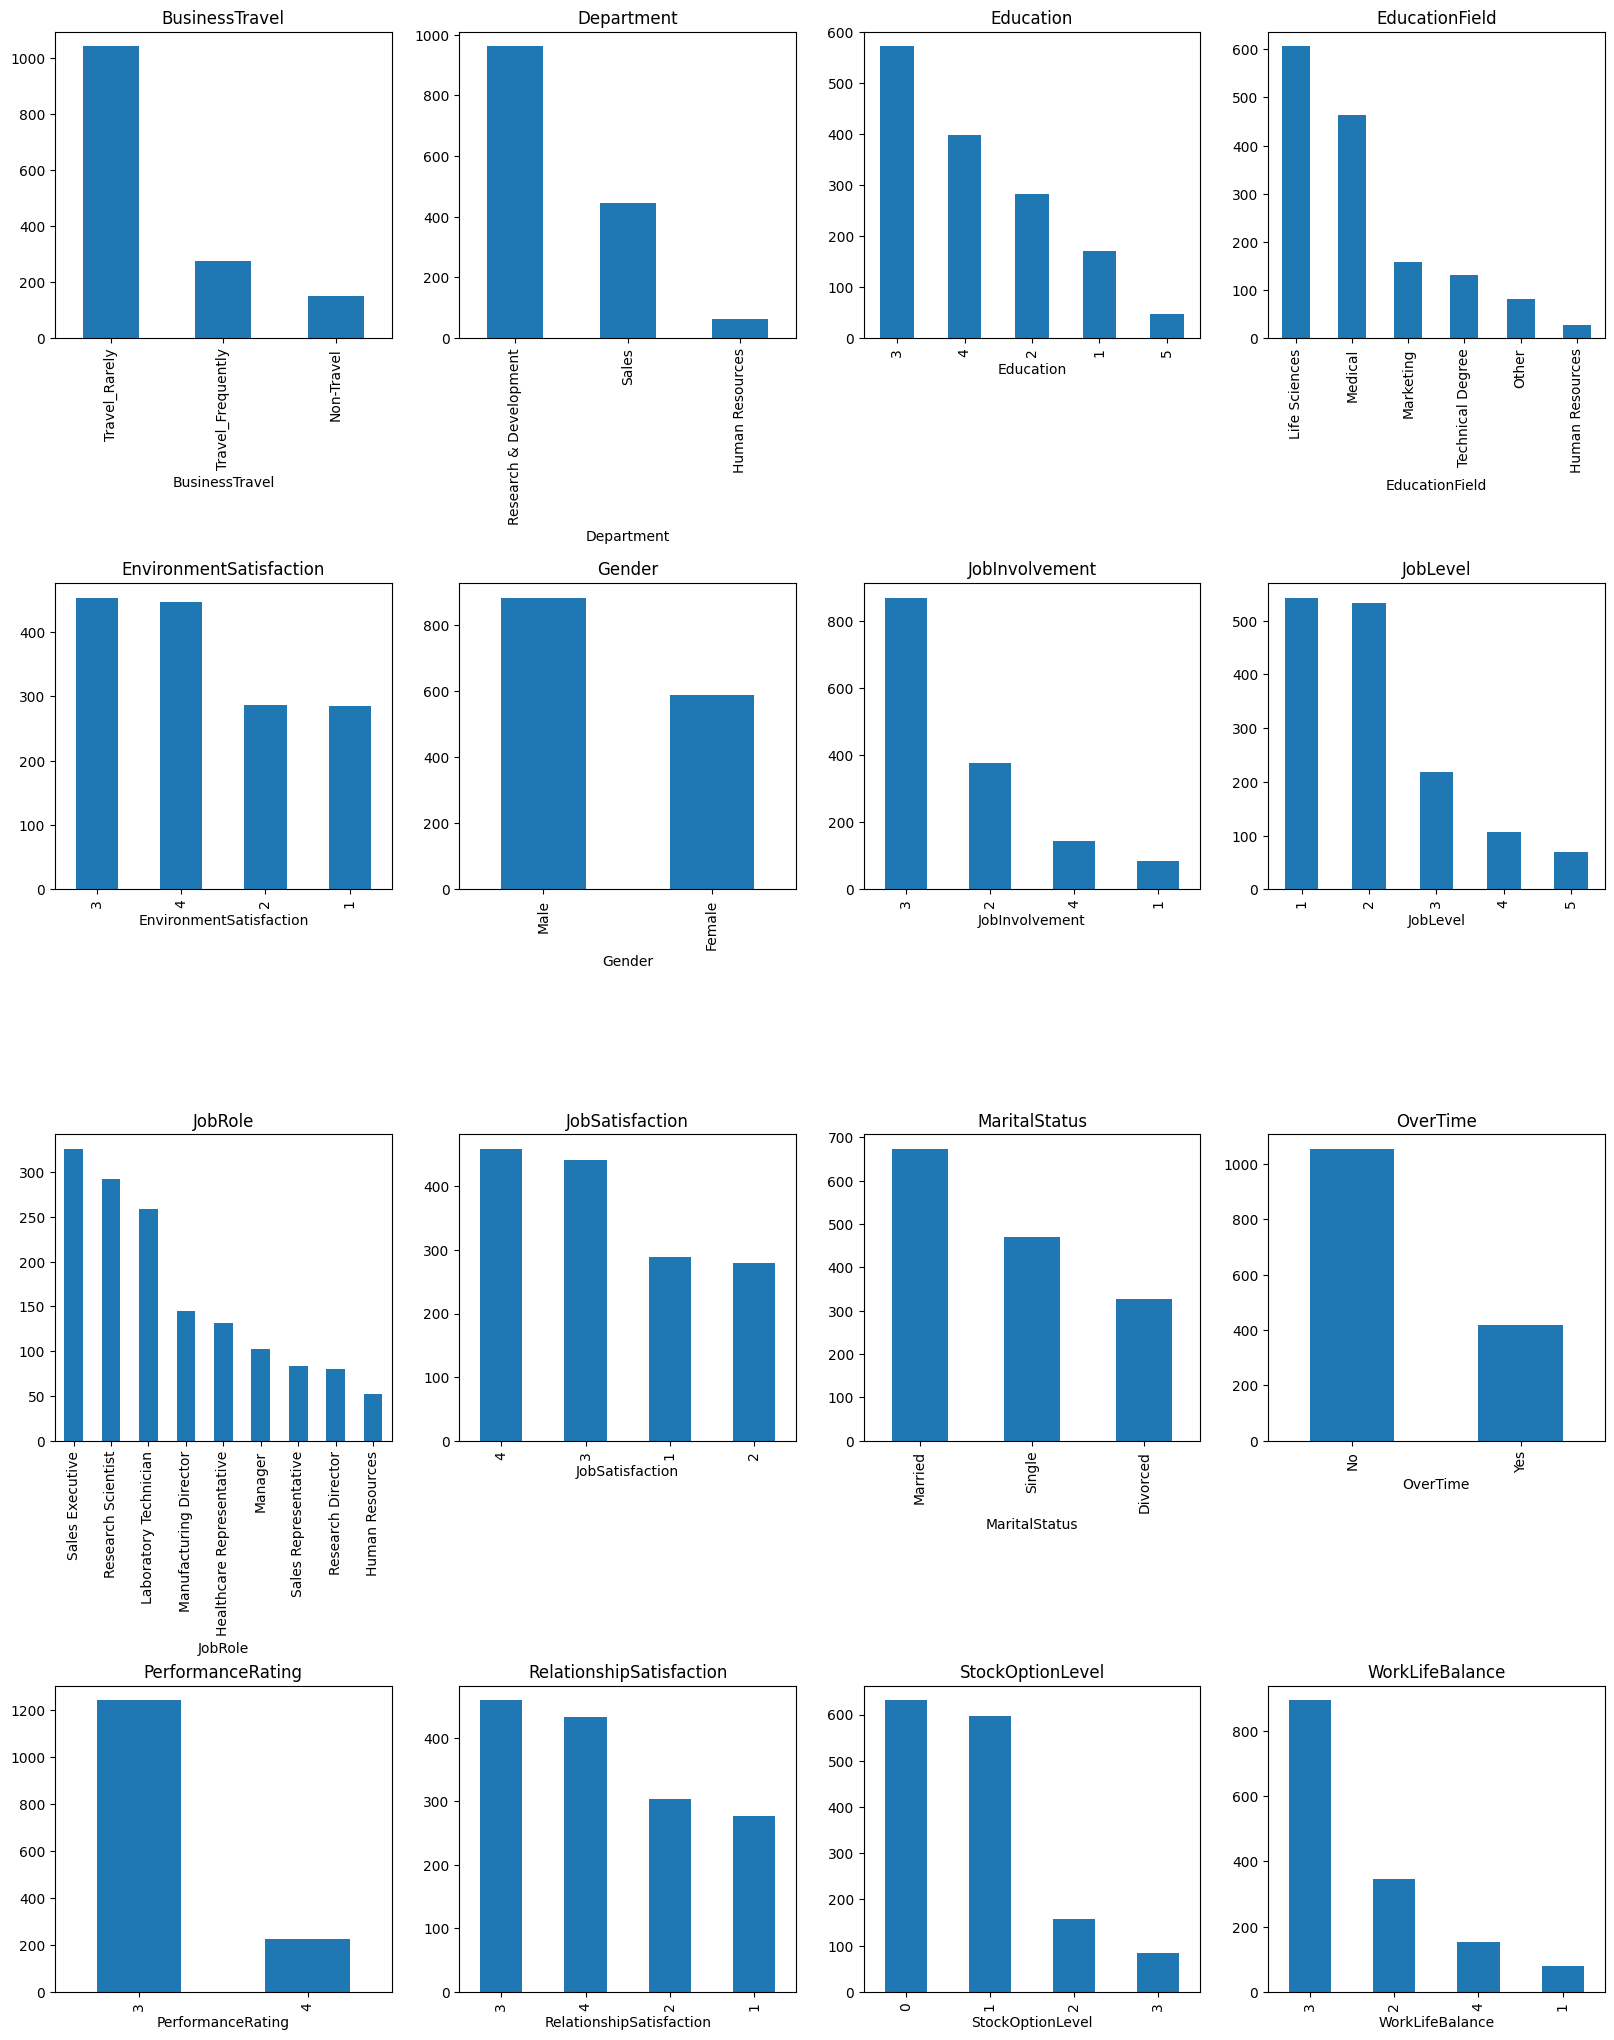

In [57]:
plt.figure(figsize=(20,20))
x=1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.8, wspace=0.2)
for column_name in list_categorical_columns:
    plt.subplot(4,4,x)
    x = x+1
    df[column_name].value_counts().plot(kind='bar')
    plt.title(column_name)
plt.show()

##### Distribution between Target column and categorical column 

In [58]:
df.groupby([column_name, "Attrition"]).count()

Age  BusinessTravel  DailyRate  Department  \
WorkLifeBalance Attrition                                               
1               No          55              55         55          55   
                Yes         25              25         25          25   
2               No         286             286        286         286   
                Yes         58              58         58          58   
3               No         766             766        766         766   
                Yes        127             127        127         127   
4               No         126             126        126         126   
                Yes         27              27         27          27   

                           DistanceFromHome  Education  EducationField  \
WorkLifeBalance Attrition                                                
1               No                       55         55              55   
                Yes                      25         25              25   
2               No                      286        286             286   
                Yes                      58         58              58   
3               No                      766        766             766   
                Yes                     127        127             127   
4               No                      126        126             126   
                Yes                      27         27              27   

                           EmployeeCount  EnvironmentSatisfaction  Gender  \
WorkLifeBalance Attrition                                                   
1               No                    55                       55      55   
                Yes                   25                       25      25   
2               No                   286                      286     286   
                Yes                   58                       58      58   
3               No                   766                      766     766   
                Yes                  127                      127     127   
4               No                   126                      126     126   
                Yes                   27                       27      27   

                           ...  PerformanceRating  RelationshipSatisfaction  \
WorkLifeBalance Attrition  ...                                                
1               No         ...                 55                        55   
                Yes        ...                 25                        25   
2               No         ...                286                       286   
                Yes        ...                 58                        58   
3               No         ...                766                       766   
                Yes        ...                127                       127   
4               No         ...                126                       126   
                Yes        ...                 27                        27   

                           StandardHours  StockOptionLevel  TotalWorkingYears  \
WorkLifeBalance Attrition                                                       
1               No                    55                55                 55   
                Yes                   25                25                 25   
2               No                   286               286                286   
                Yes                   58                58                 58   
3               No                   766               766                766   
                Yes                  127               127                127   
4               No                   126               126                126   
                Yes                   27                27                 27   

                           TrainingTimesLastYear  YearsAtCompany  \
WorkLifeBalance Attrition                                          
1               No                            

In [59]:
df.groupby([column_name, "Attrition"]).count()["Age"]

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: Age, dtype: int64

In [60]:
df.groupby([column_name, "Attrition"]).count()["Age"].unstack()

Attrition         No  Yes
WorkLifeBalance          
1                 55   25
2                286   58
3                766  127
4                126   27

<Figure size 3000x3000 with 0 Axes>

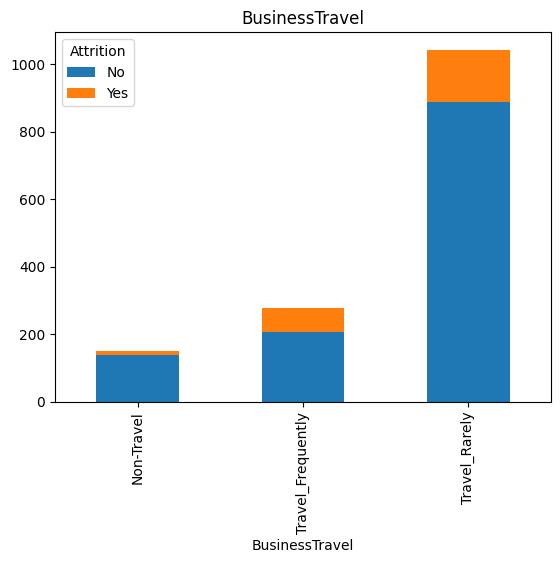

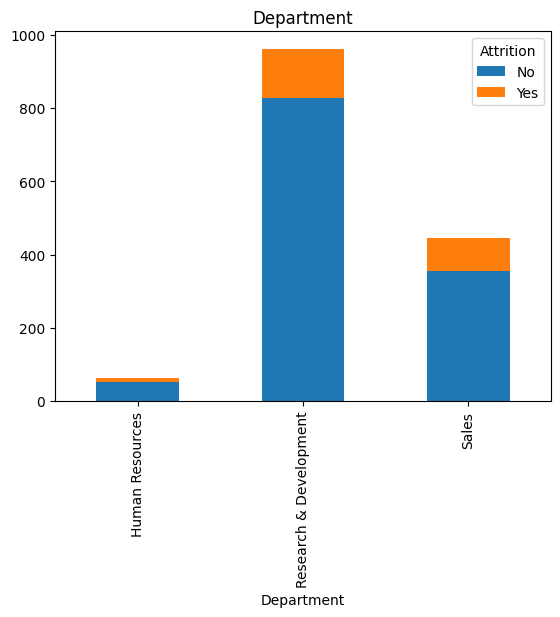

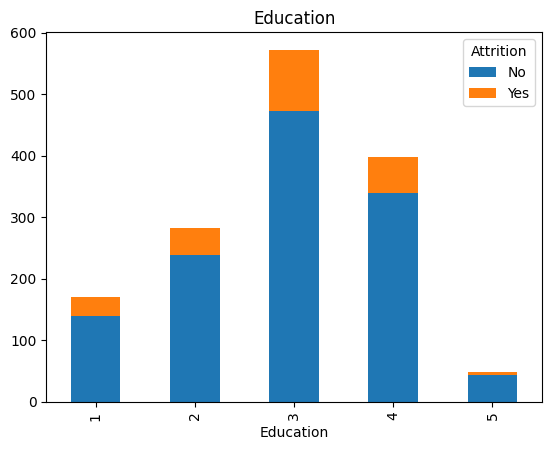

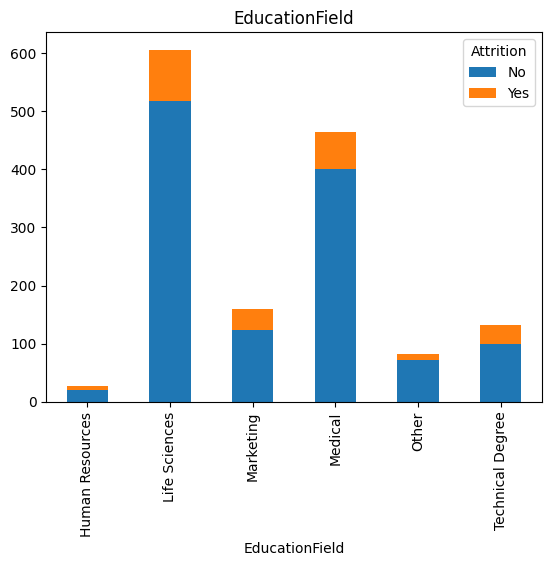

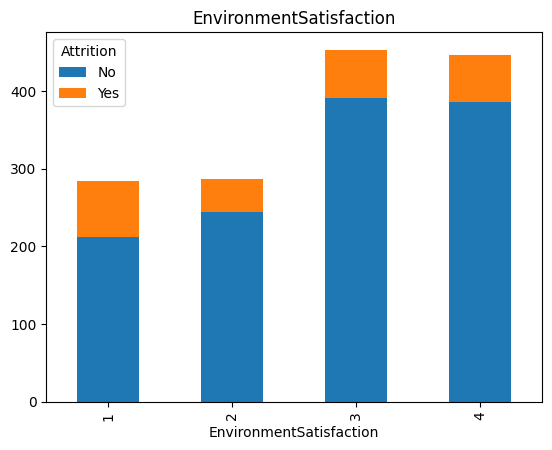

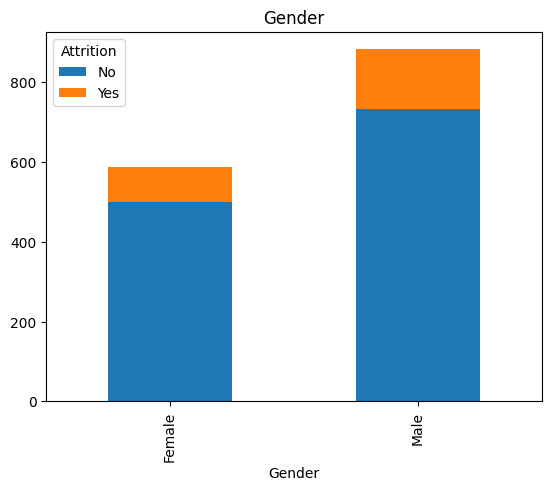

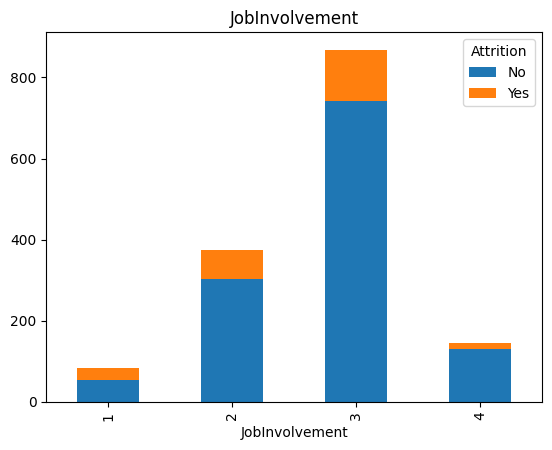

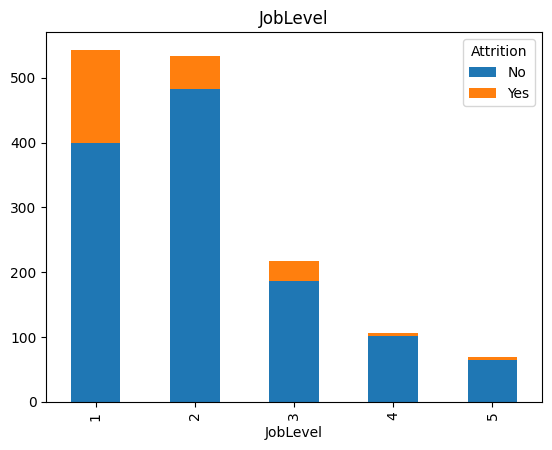

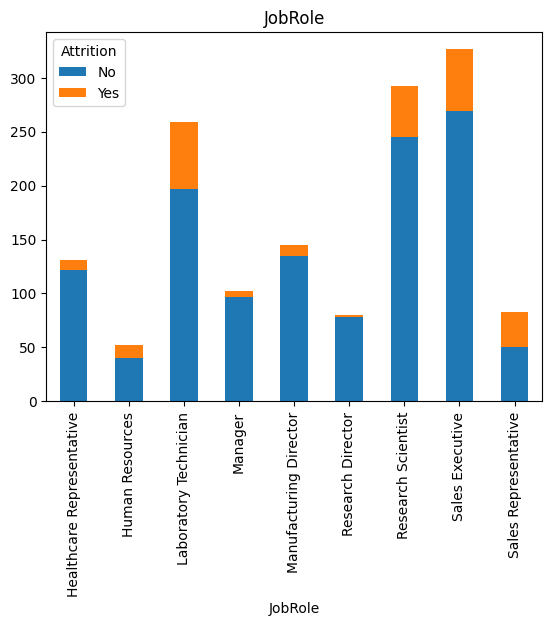

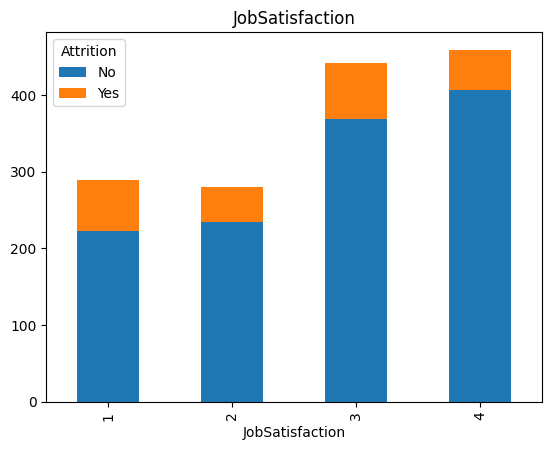

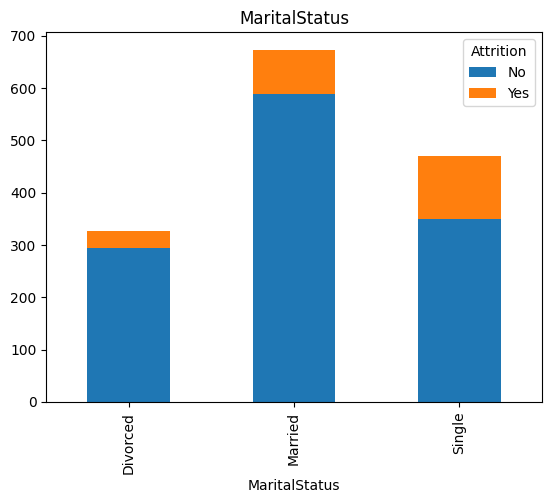

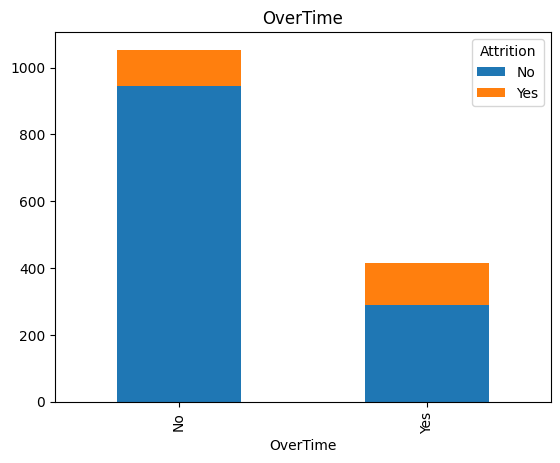

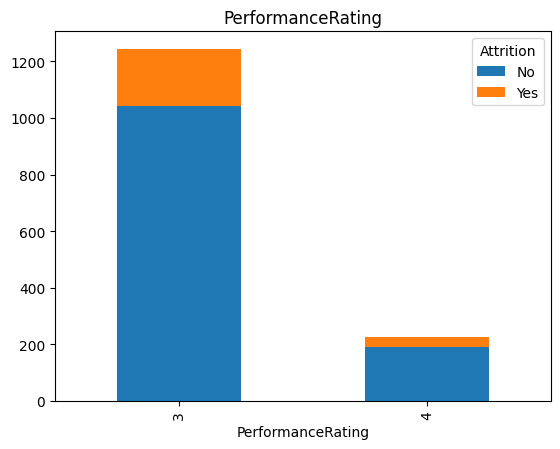

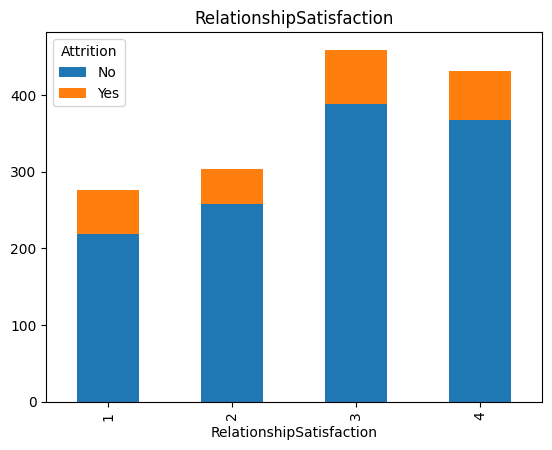

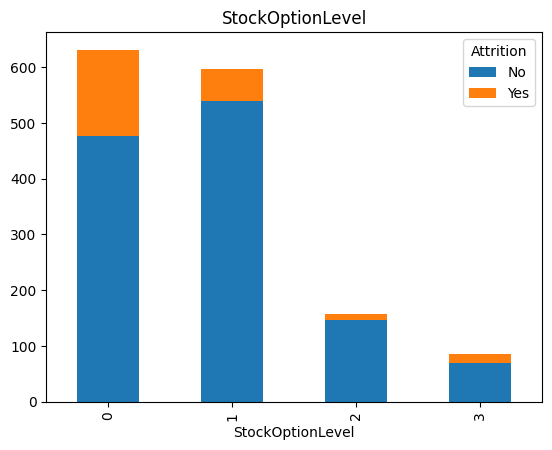

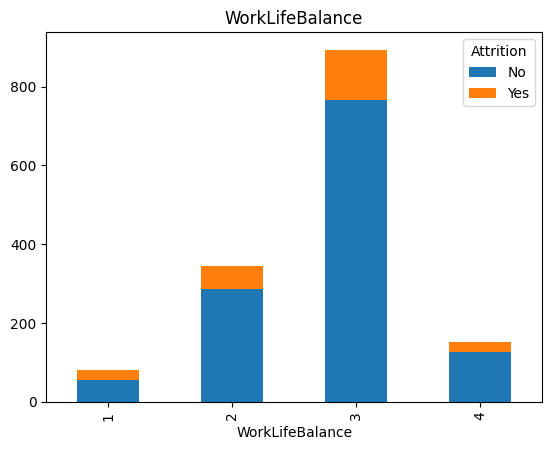

In [61]:
plt.figure(figsize=(30,30))
x = 1
#plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.8, wspace=0.2)
for column_name in list_categorical_columns:
    x = x+1
    df.groupby([column_name, "Attrition"]).count()["Age"].unstack().plot(kind='bar', stacked=True) #age대신 아무거나 해도 상관없음
    plt.title(column_name)
plt.show()

Because the target column (Attrition) is imbalanced, representing it as above makes it difficult to understand the data distribution. Instead of using counts, use a cross-tabulation.

In [62]:
# !!wrong!!!!
pd.crosstab(df[target_column], df["WorkLifeBalance"], normalize="index") 


WorkLifeBalance         1         2         3         4
Attrition                                              
No               0.044607  0.231955  0.621249  0.102190
Yes              0.105485  0.244726  0.535865  0.113924

In [63]:
# Right!!!
pd.crosstab(df[target_column], df["WorkLifeBalance"], normalize="columns")

WorkLifeBalance       1         2         3         4
Attrition                                            
No               0.6875  0.831395  0.857783  0.823529
Yes              0.3125  0.168605  0.142217  0.176471

In [64]:
pd.crosstab(df["WorkLifeBalance"], df[target_column], normalize="columns")

Attrition              No       Yes
WorkLifeBalance                    
1                0.044607  0.105485
2                0.231955  0.244726
3                0.621249  0.535865
4                0.102190  0.113924

<Figure size 3000x3000 with 0 Axes>

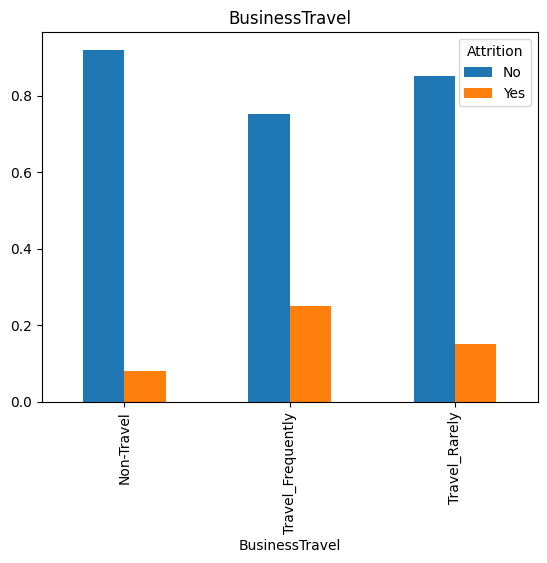

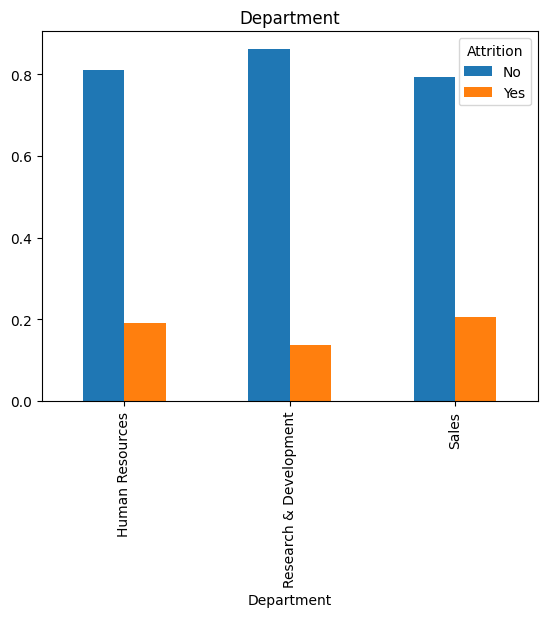

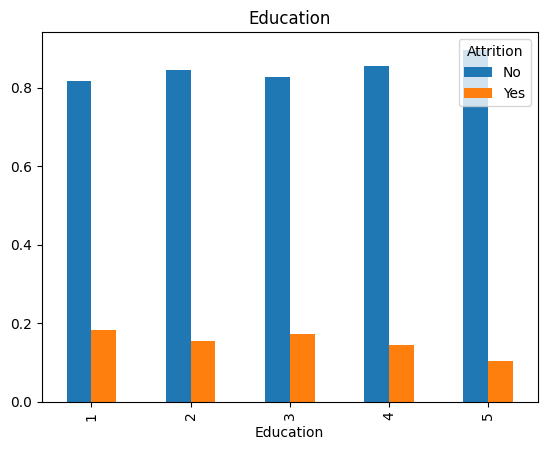

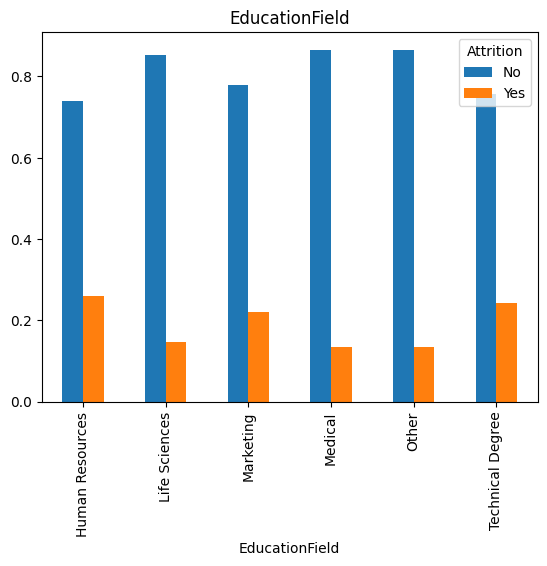

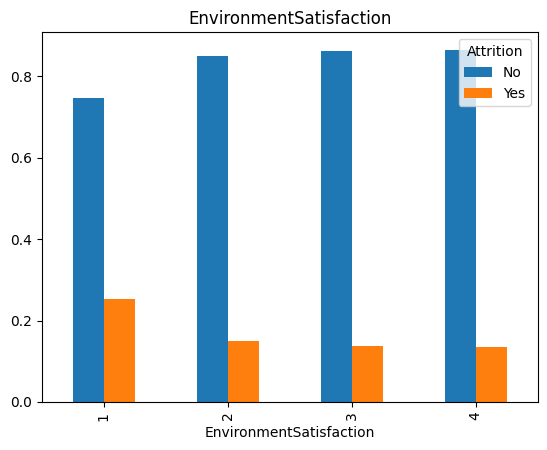

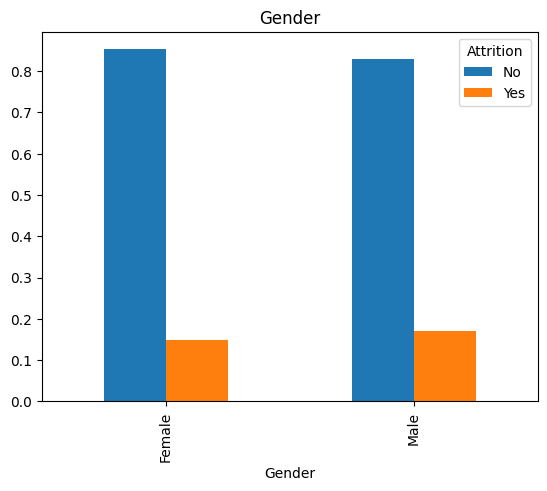

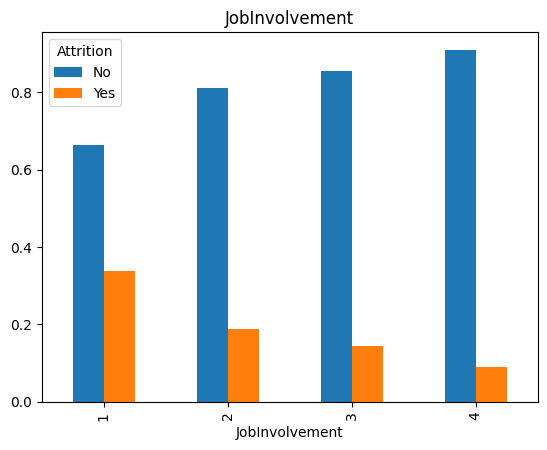

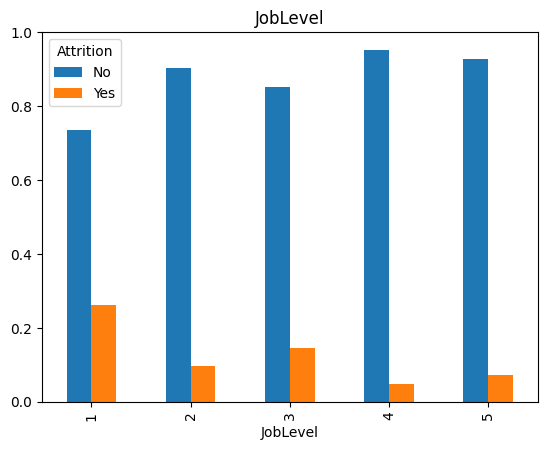

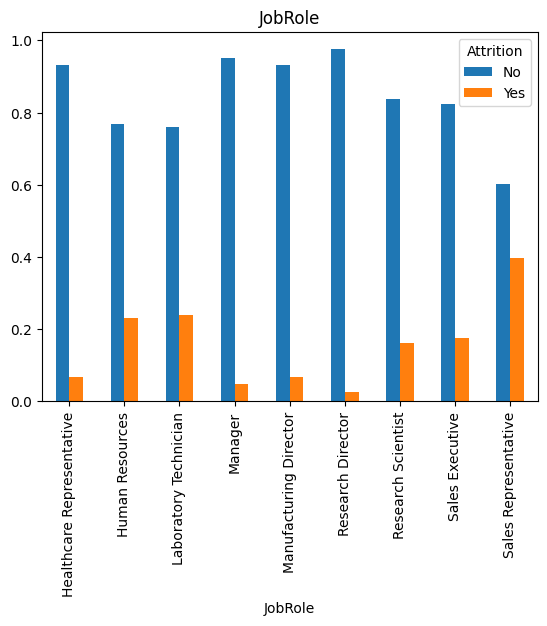

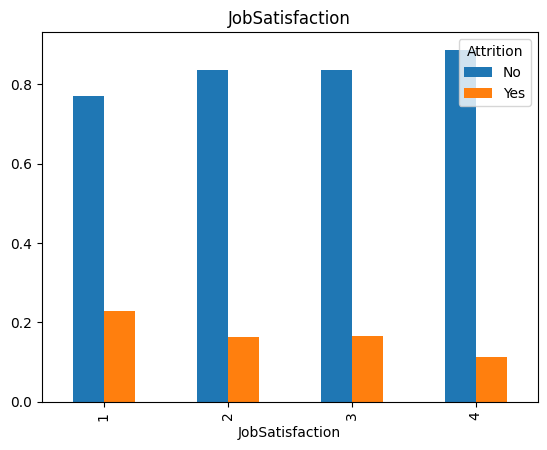

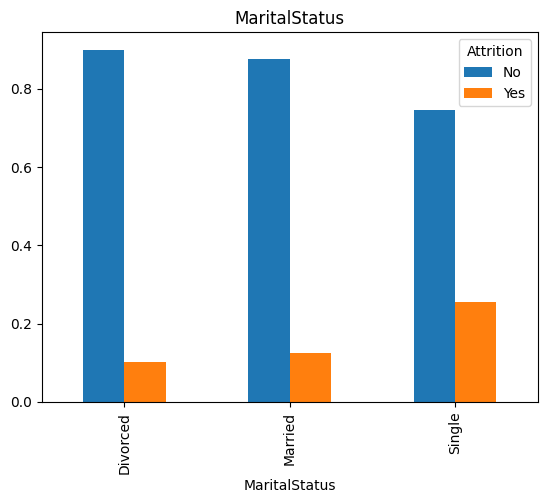

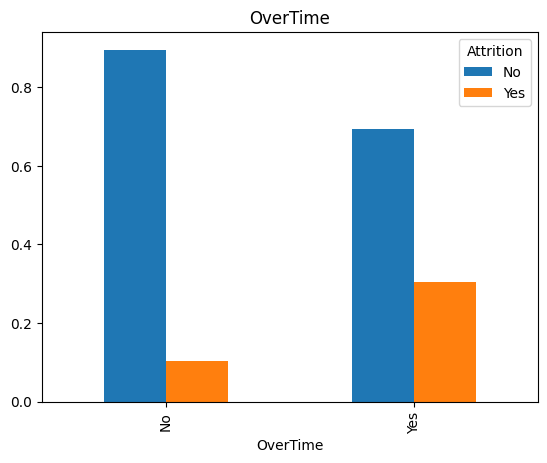

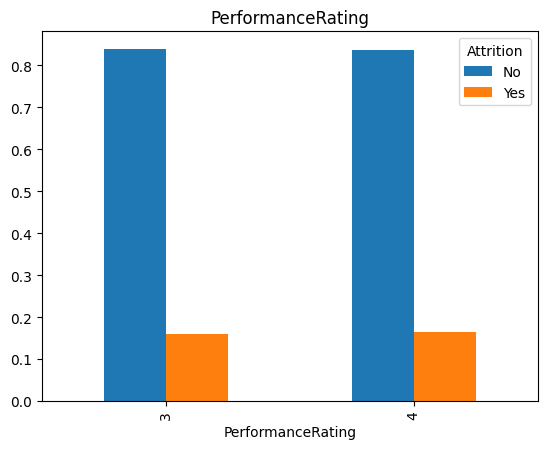

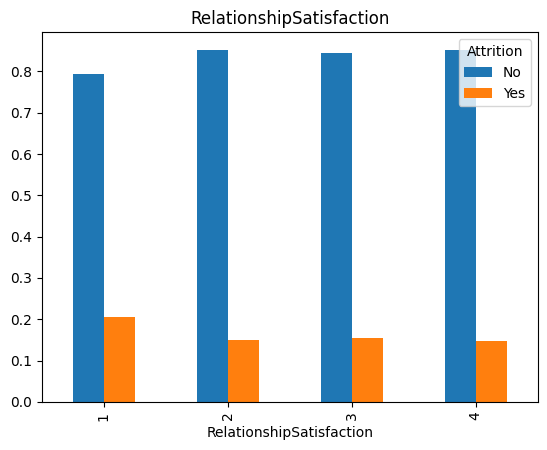

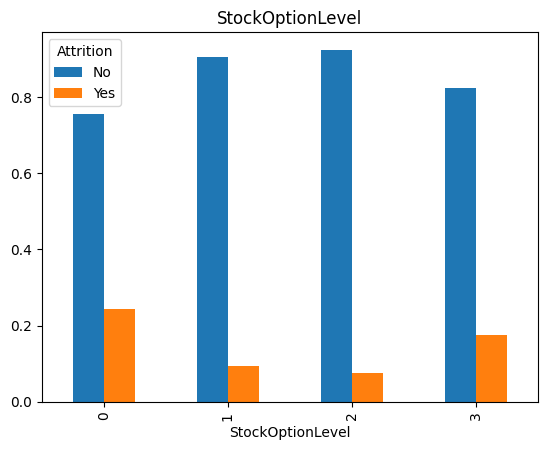

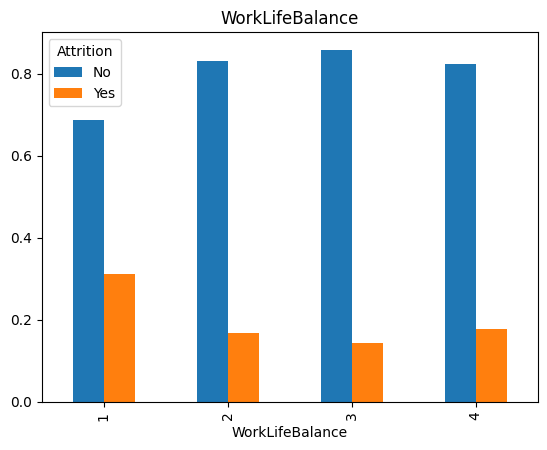

In [65]:
plt.figure(figsize=(30,30))
x = 1
#plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.8, wspace=0.2)
for column_name in list_categorical_columns:
    x = x+1
    #df.groupby([column_name, "Attrition"]).count()["Age"].unstack().plot(kind='bar', stacked=True)
    #pd.crosstab(df[target_column], df[column_name], normalize="index").plot.bar()
    pd.crosstab(df[column_name], df[target_column], normalize="index").plot.bar()
    plt.title(column_name)
plt.show()

#pd.crosstab(df[target_column], df[column_name], normalize="index").plot.bar()

#### Chi-Square Test
- The chi-square test is a method for analyzing the relationship between two categorical variables.
- For example, comparing preferred movie genres based on gender.
- There are three types of chi-square tests, which differ based on data collection methods and hypotheses. In this exercise, we will conduct a test of independence.
- I will examine the relationship between categorical columns among the independent variables and Attrition.
- If the p-value is below 0.05, the null hypothesis is rejected. (The p-value threshold can vary; while there is no strict rule, 0.05 is commonly used).

Explanation of Chi-Square Test: 3 Types
1. Goodness of Fit Test
- Number of Variables: 1
- Purpose: To determine if the observed distribution matches an expected distribution.
- Example: A box is known to contain 3 types of balls in equal proportions. After drawing 100 balls, the proportions of each color are calculated. The test checks if the observed proportions follow the known distribution.
- Null Hypothesis: The observed distribution of variable X is the same as the expected distribution.
- Alternative Hypothesis: The observed distribution of variable X is different from the expected distribution.

2. Test of Independence
- Number of Variables: 2
- Purpose: To determine if there is an association between two categorical variables.
- Example: Investigating whether gender is related to smoking status by sampling 200 individuals.
- Null Hypothesis: Variables X and Y are independent.
- Alternative Hypothesis: Variables X and Y are not independent.

3. Test of Homogeneity
- Number of Variables: 2
- Purpose: To determine if different groups have the same distribution.
- Example: After investigating smoking rates among men and women, the test checks if the smoking rates in both groups are the same.
- Null Hypothesis: The probability distributions of the groups are identical.
- Alternative Hypothesis: The probability distributions of the groups are different.

In [66]:
list_meaningful_column_by_chi = []
for column_name in list_categorical_columns:
    statistic, pvalue, _, _= chi2_contingency(pd.crosstab(df[target_column],df[column_name]))
    if pvalue <=0.05:
        list_meaningful_column_by_chi.append(column_name)
    print(column_name,  ", ", statistic, ", ", pvalue)
print("all categorical columns : ", len(list_categorical_columns))
print("selected columns by chi : ", len(list_meaningful_column_by_chi), list_meaningful_column_by_chi)

BusinessTravel ,  24.182413685655174 ,  5.608614476449931e-06
Department ,  10.79600732241067 ,  0.004525606574479633
Education ,  3.0739613982367193 ,  0.5455253376565949
EducationField ,  16.024674119585423 ,  0.006773980139025222
EnvironmentSatisfaction ,  22.503881435842295 ,  5.1234689062894205e-05
Gender ,  1.1169671241970975 ,  0.29057244902890855
JobInvolvement ,  28.492021234659283 ,  2.8631806367134195e-06
JobLevel ,  72.52901310667391 ,  6.634684715458909e-15
JobRole ,  86.19025367670434 ,  2.752481638050657e-15
JobSatisfaction ,  17.505077010348 ,  0.0005563004510387556
MaritalStatus ,  46.163676540848705 ,  9.45551106034083e-11
OverTime ,  87.56429365828768 ,  8.15842372153832e-21
PerformanceRating ,  0.00015475439428271534 ,  0.9900745465934576
RelationshipSatisfaction ,  5.241067859713708 ,  0.15497244371052626
StockOptionLevel ,  60.59830108612225 ,  4.379390336108354e-13
WorkLifeBalance ,  16.3250970916474 ,  0.0009725698845348824
all categorical columns :  16
selected

* Insight
- Identified categorical data that do not have a significant relationship with Attrition (dependent variable).
- Utilize the results from point 1 for feature selection and model optimization.

#### 2) Numeric Data Analysis

Removing Unnecessary Columns

In [67]:
df[list_numeric_columns].nunique().sort_values()

EmployeeCount                 1
StandardHours                 1
TrainingTimesLastYear         7
NumCompaniesWorked           10
PercentSalaryHike            15
YearsSinceLastPromotion      16
YearsWithCurrManager         18
YearsInCurrentRole           19
DistanceFromHome             29
YearsAtCompany               37
TotalWorkingYears            40
Age                          43
HourlyRate                   71
DailyRate                   886
MonthlyIncome              1349
MonthlyRate                1427
dtype: int64

In [68]:
df["MonthlyRate"]

0       19479
1       24907
2        2396
3       23159
4       16632
        ...  
1465    12290
1466    21457
1467     5174
1468    13243
1469    10228
Name: MonthlyRate, Length: 1470, dtype: int64

In [69]:
# unique number = 1 should dropped
df = df.drop(["EmployeeCount", "StandardHours"], axis=1).copy()
list_numeric_columns.remove("EmployeeCount")
list_numeric_columns.remove("StandardHours")
print(list_numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


##### Column distribution

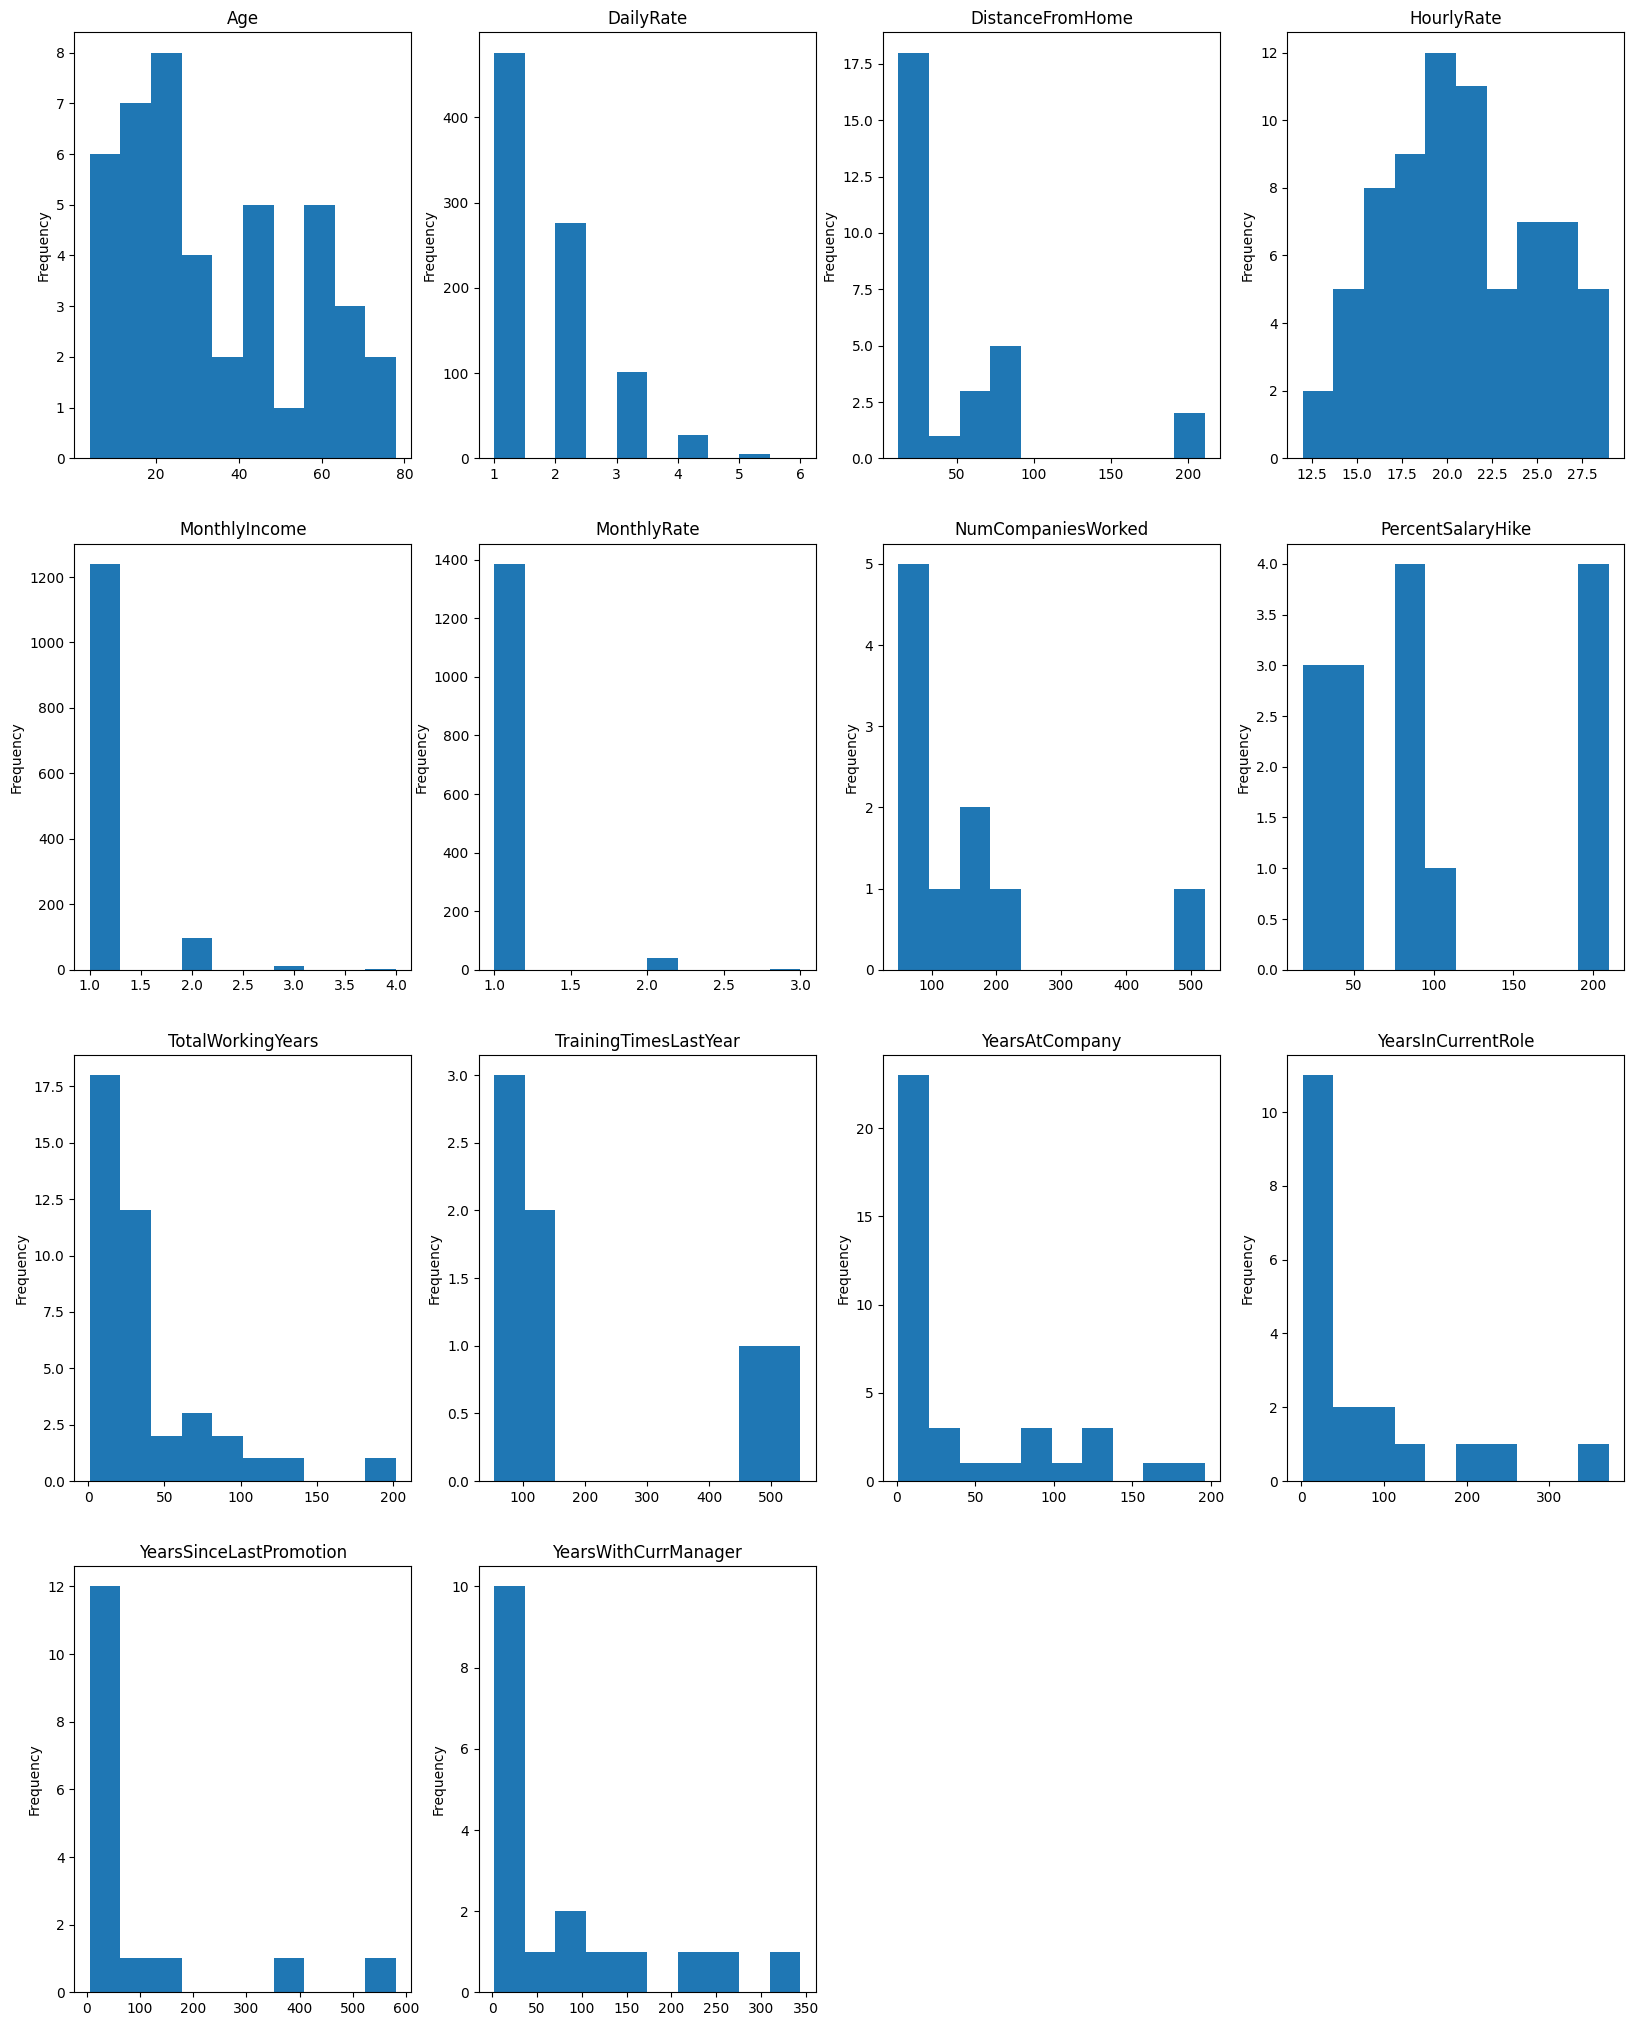

In [70]:
# Distribution of numeric columns
plt.figure(figsize=(20,20))
x=1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(4,4,x)
    x=x+1
    df[column_name].value_counts().plot(kind='hist')
    plt.title(column_name)
plt.show()

we can use pairplot but hard to see and takes memory.

<Axes: xlabel='MonthlyIncome', ylabel='Age'>

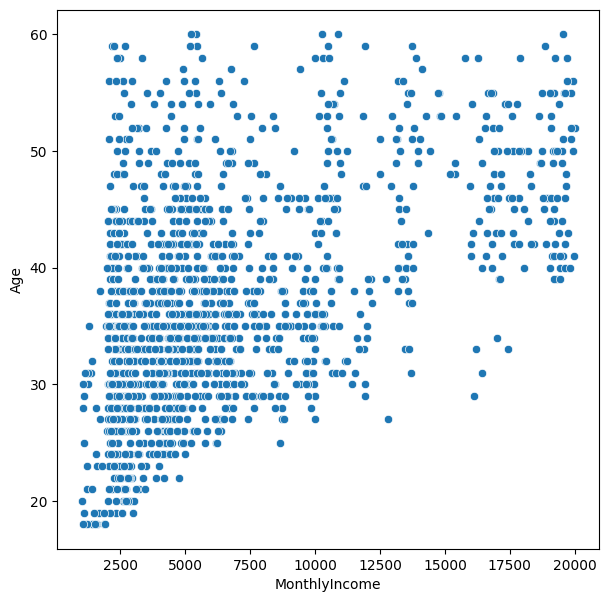

In [71]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="MonthlyIncome", y="Age")

<Axes: xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

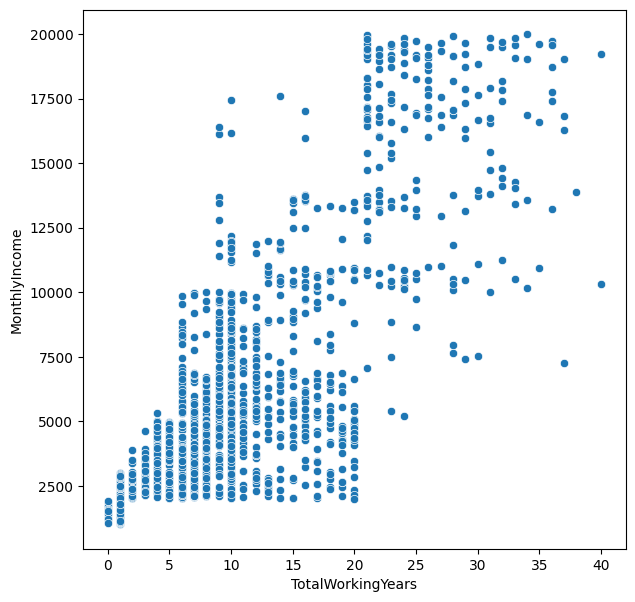

In [72]:
# scatter plot 2
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="TotalWorkingYears", y="MonthlyIncome")

<Axes: xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

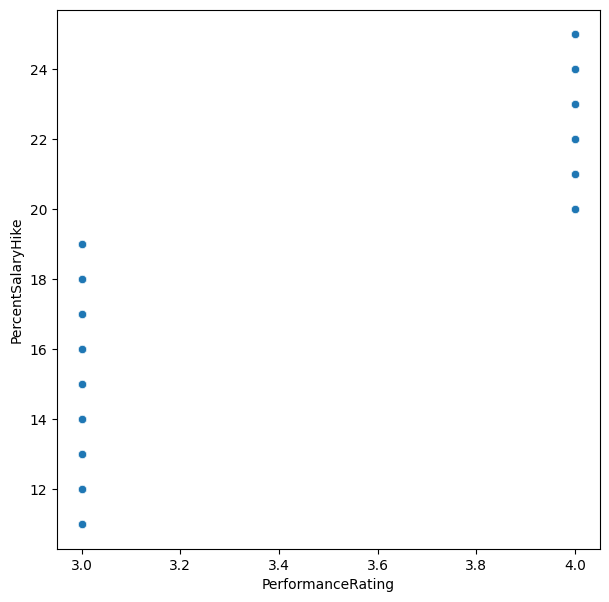

In [73]:
# scatter plot 3
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="PerformanceRating", y="PercentSalaryHike")

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

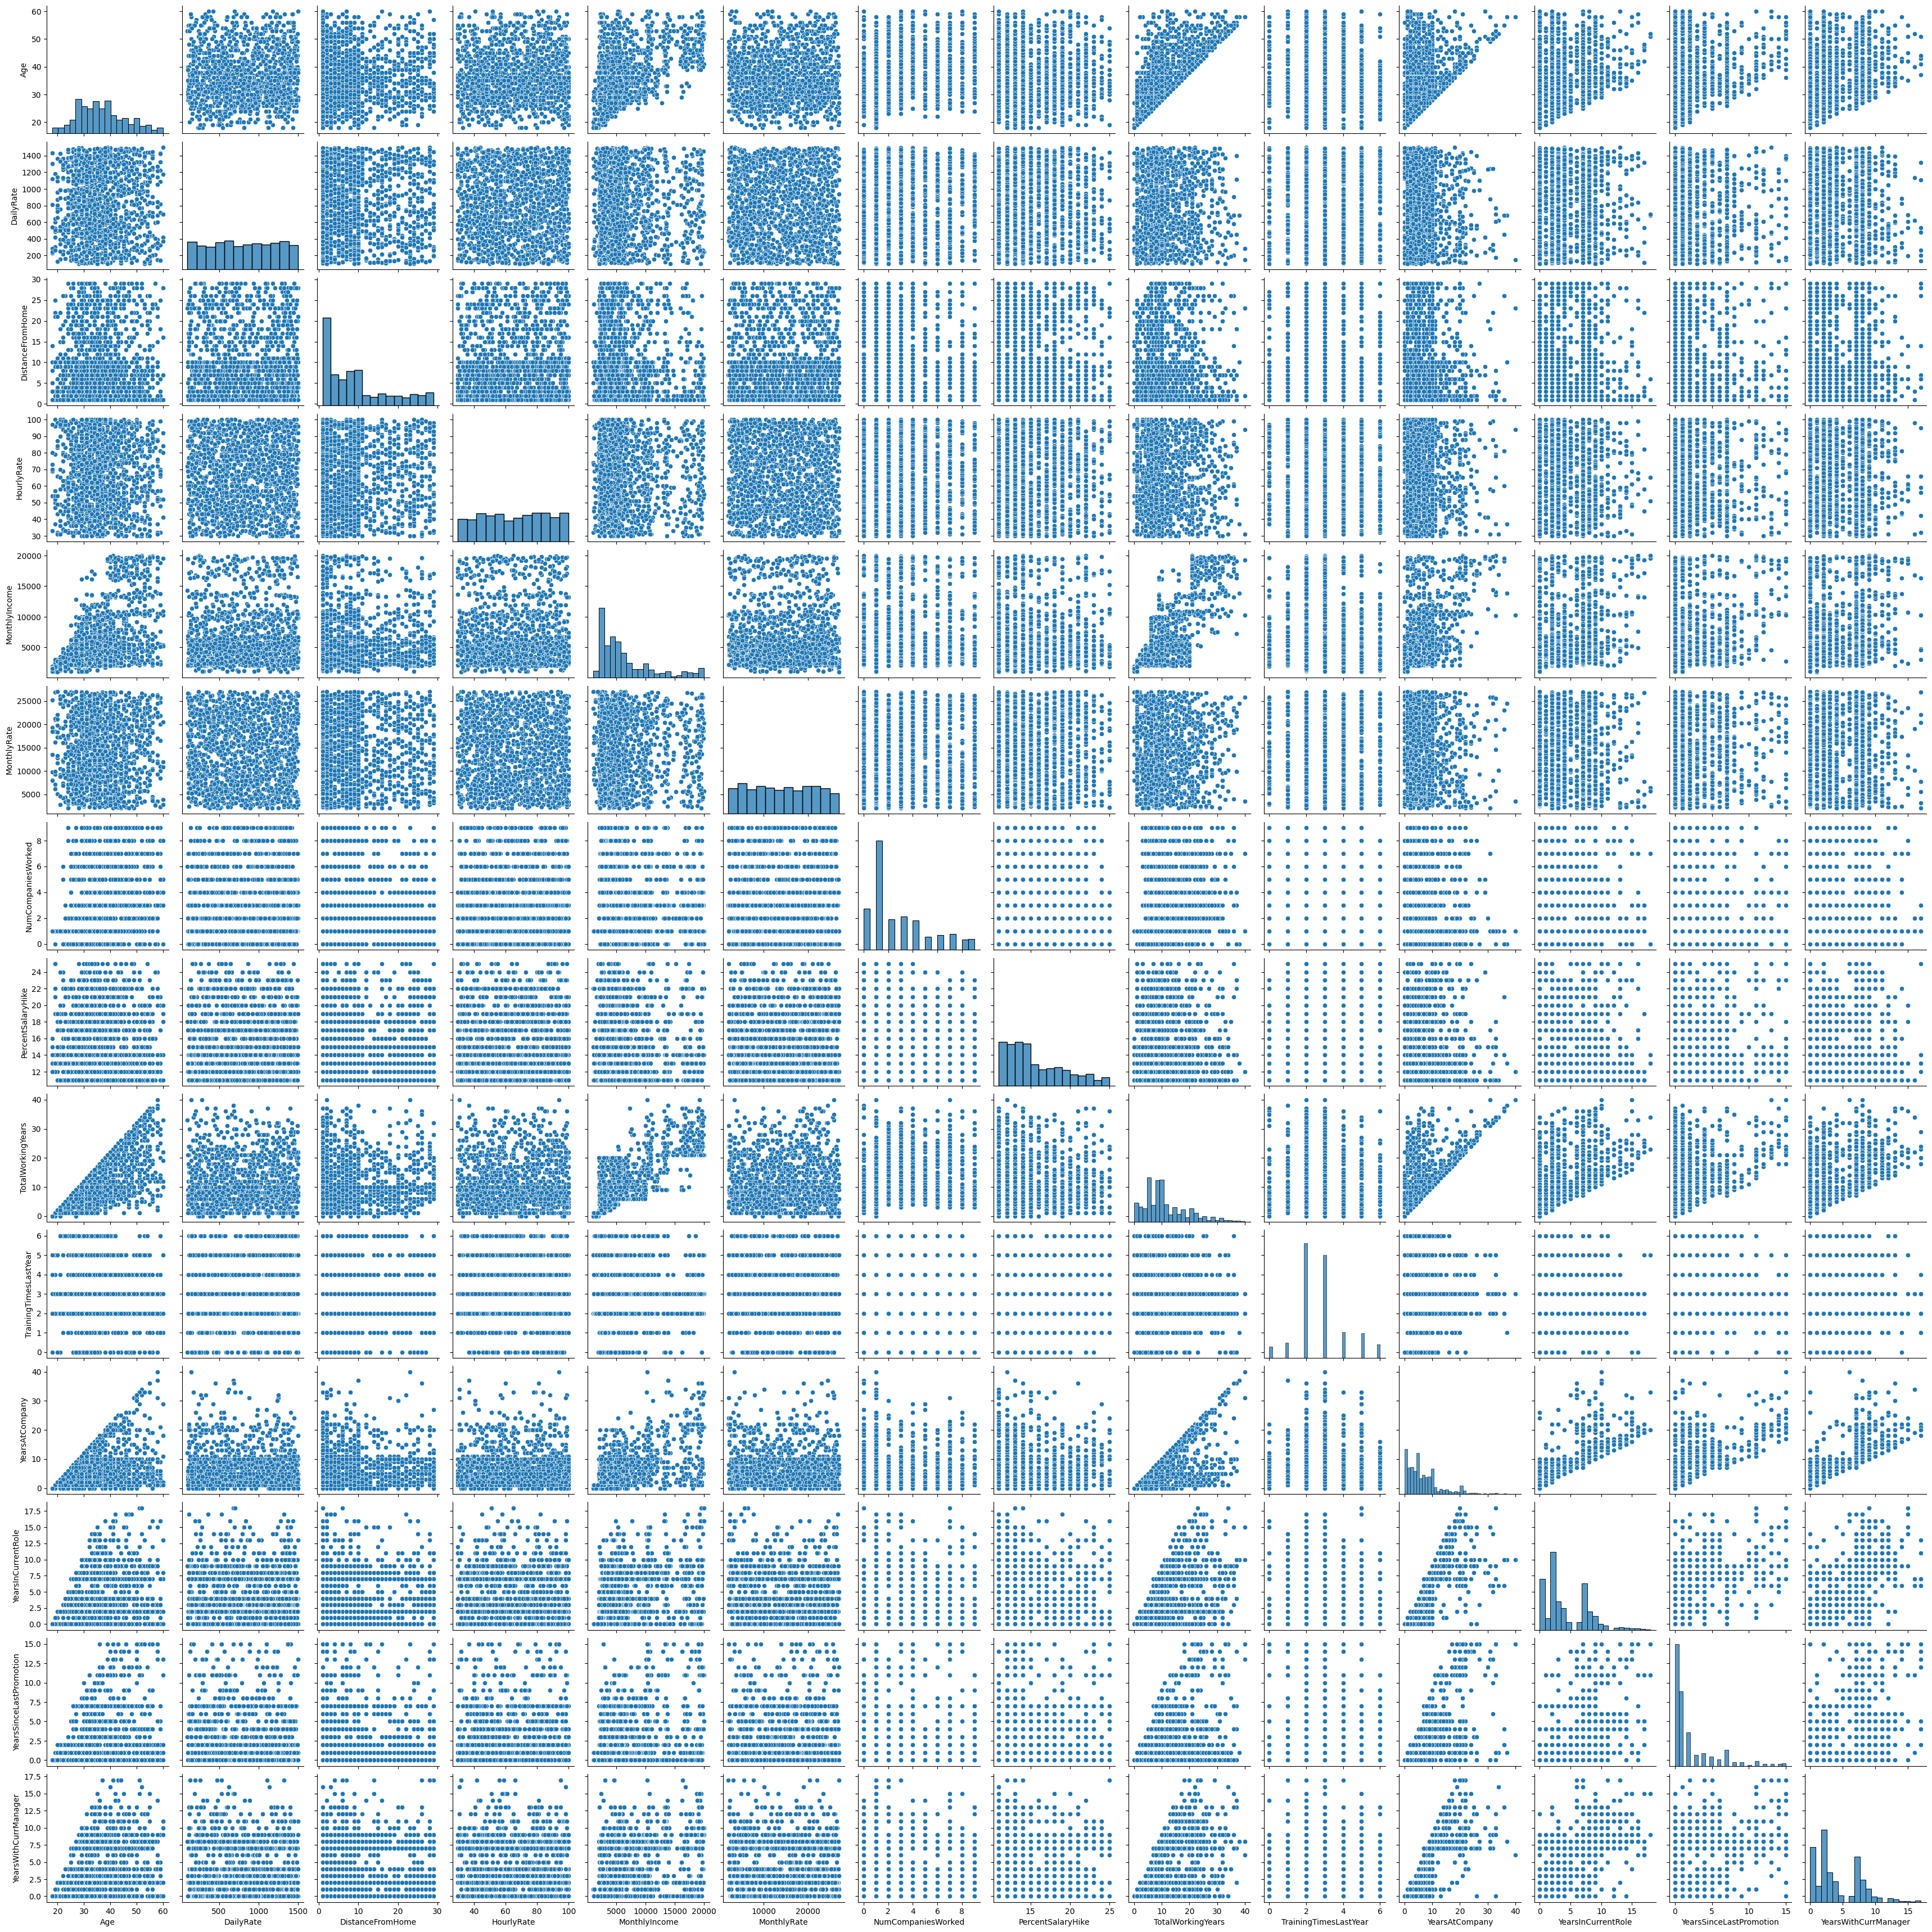

In [74]:
sns.pairplot(df[list_numeric_columns])

##### Correlation Analysis

<Axes: >

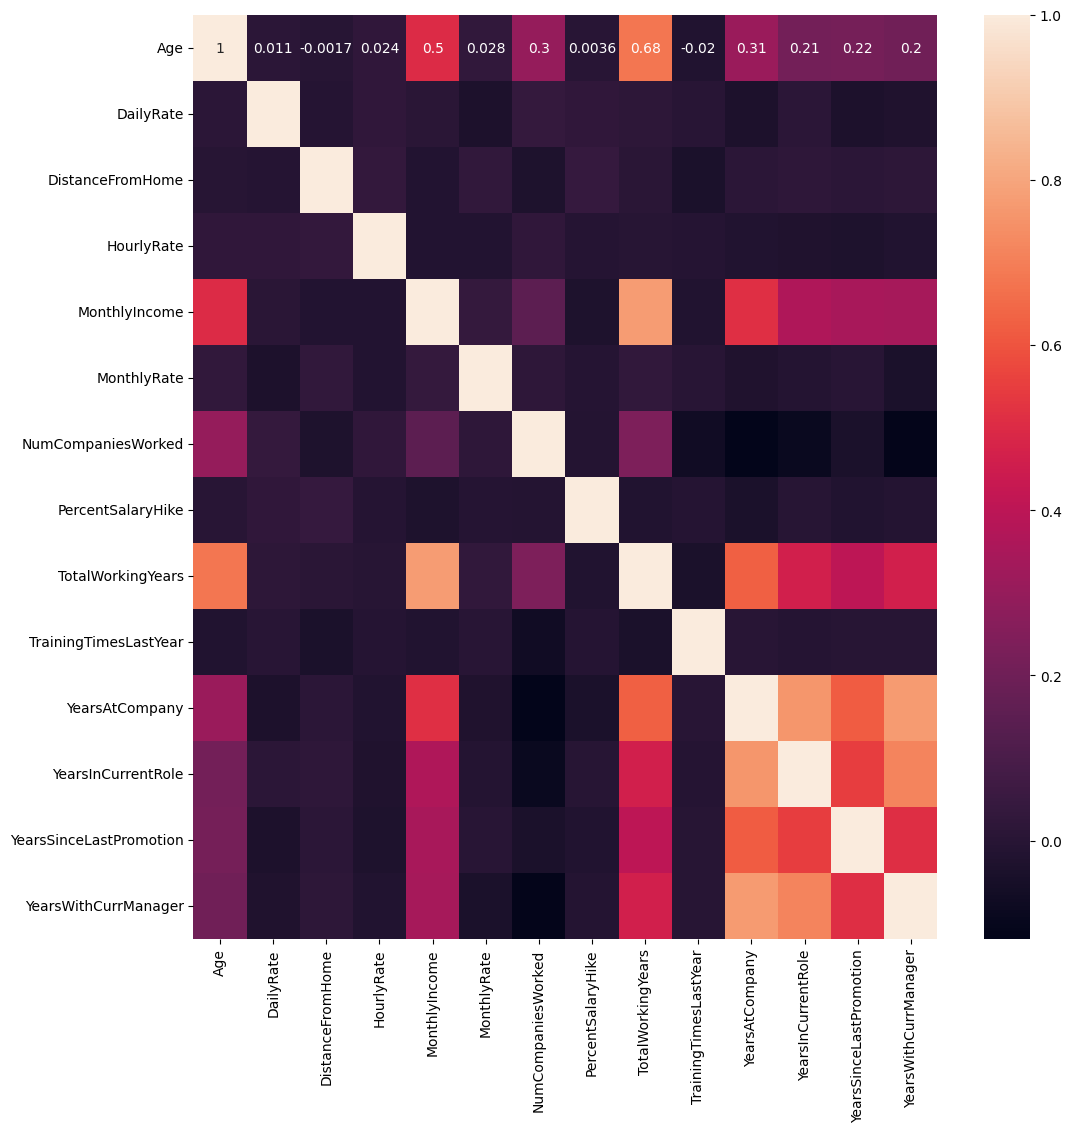

In [75]:
df_corr = df[list_numeric_columns].corr()
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True)
# hmmm.. not sure why annotation is not showing correctly....

##### VIF Analysis
- Generally, multicollinearity is assumed to be present if the VIF is 10 or higher.
- Perform another check before removing highly correlated columns (double-check; this step is optional and depends on individual judgment).

In [76]:
def caculate_vif(df_target):
  vif = pd.DataFrame()
  vif['VIF_Factor'] = [variance_inflation_factor(df_target.values, i) for i in range(df_target.shape[1])]
  vif['Feature'] = df_target.columns
  return vif

df_vif = df[list_numeric_columns].copy()

In [77]:
caculate_vif(df_vif)

VIF_Factor                  Feature
0    25.496860                      Age
1     4.721572                DailyRate
2     2.271398         DistanceFromHome
3     9.767720               HourlyRate
4     7.286833            MonthlyIncome
5     4.737393              MonthlyRate
6     2.675998       NumCompaniesWorked
7    13.578688        PercentSalaryHike
8    13.311109        TotalWorkingYears
9     5.302141    TrainingTimesLastYear
10   10.485271           YearsAtCompany
11    6.342271       YearsInCurrentRole
12    2.437206  YearsSinceLastPromotion
13    6.380952     YearsWithCurrManager

In [78]:
# Recheck the VIF
caculate_vif(df_vif.drop(["TotalWorkingYears","Age","PercentSalaryHike"],axis=1)) 

VIF_Factor                  Feature
0     4.365355                DailyRate
1     2.205211         DistanceFromHome
2     7.507071               HourlyRate
3     4.212697            MonthlyIncome
4     4.343285              MonthlyRate
5     2.263575       NumCompaniesWorked
6     4.710238    TrainingTimesLastYear
7     9.432830           YearsAtCompany
8     6.322306       YearsInCurrentRole
9     2.435655  YearsSinceLastPromotion
10    6.346938     YearsWithCurrManager

In [79]:
list_numeric_feature_by_vif = list_numeric_columns.copy()
list_numeric_feature_by_vif.remove("TotalWorkingYears")
list_numeric_feature_by_vif.remove("Age")
list_numeric_feature_by_vif.remove("PercentSalaryHike")

list_numeric_feature_by_vif

['DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

##### Distribution between Target Column and numeric Column 

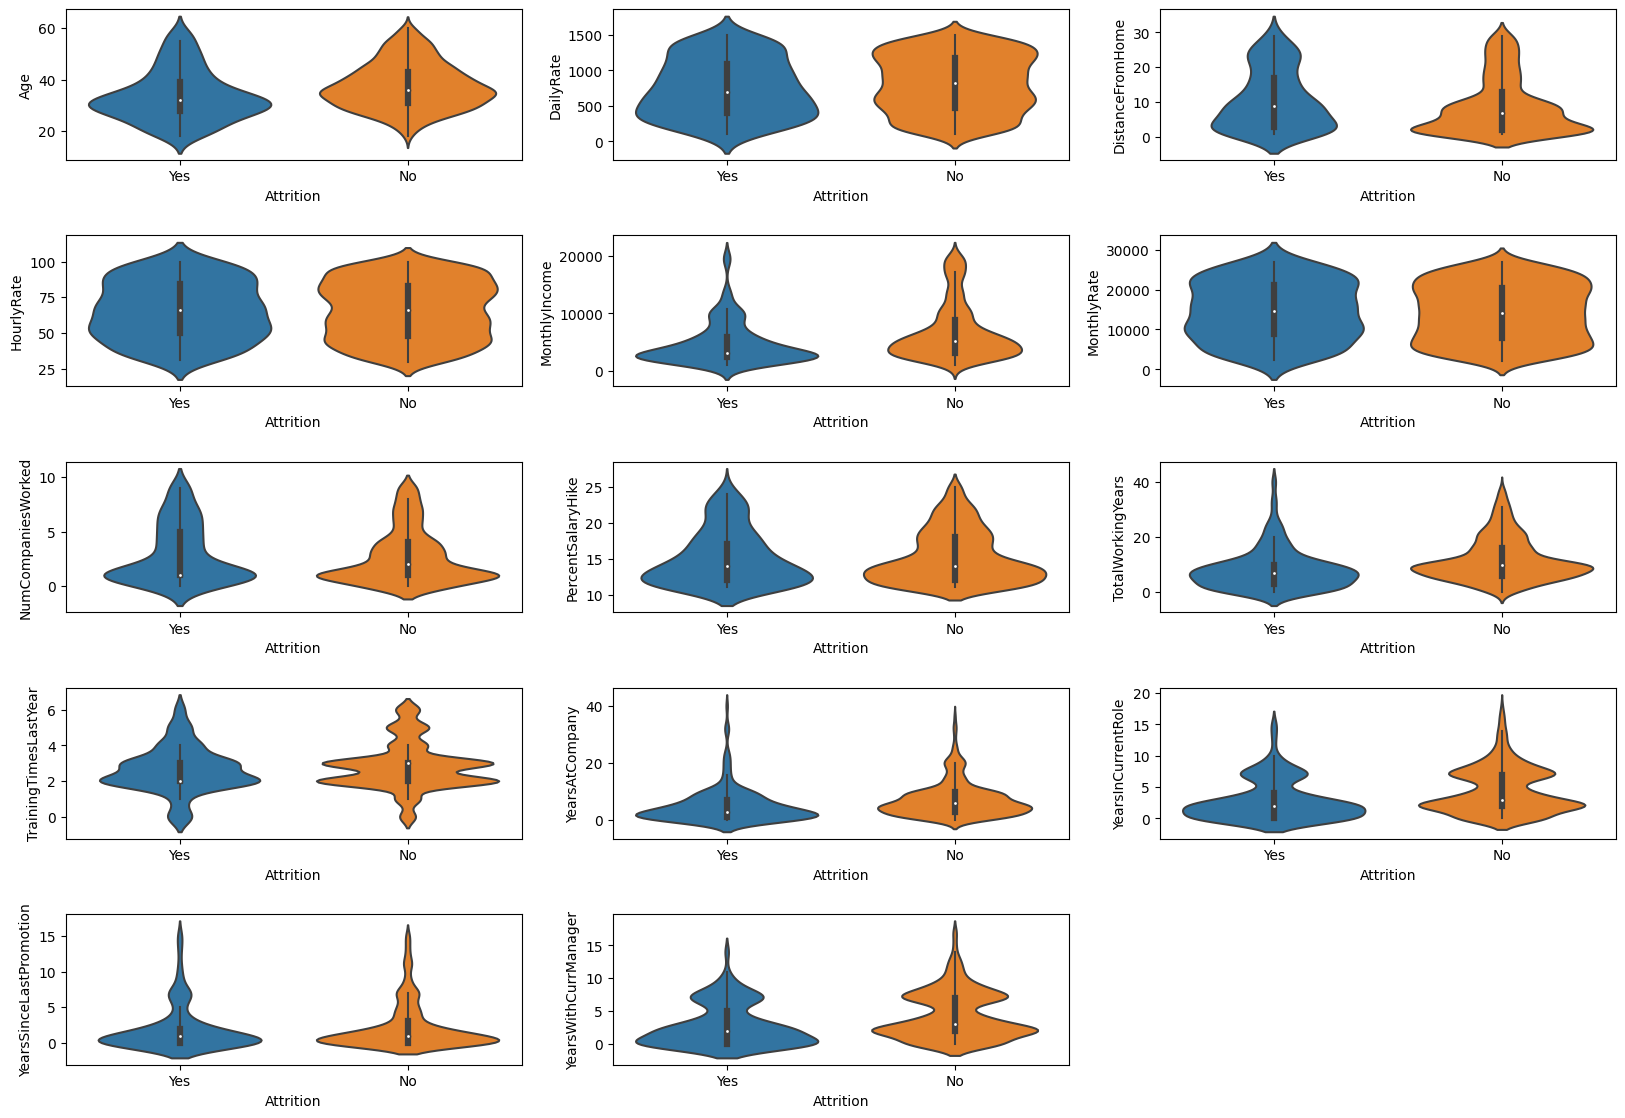

In [80]:
plt.figure(figsize=(20,20))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(9,3,x)
    x = x + 1
    sns.violinplot(data=df,x=target_column,y=column_name)
plt.show()

#### One-Way Analysis of Variance (ANOVA)
- Used to test differences in the distribution of numeric data across categories.
For example, testing the height distribution across different genders.
- Assumptions: Normality, homogeneity of variances, and independence (the test cannot be trusted if these are not satisfied).
- We will test the relationship between categorical data and arr_delay distribution.
- If the p-value is less than or equal to 0.05, we reject the null hypothesis (though the p-value threshold can vary, 0.05 is commonly used).

#### Normality Test

- Null Hypothesis: The population distribution is normal.
- Test Methods: Shapiro-Wilks Test, QQ plot
- If p-value < 0.05, reject the null hypothesis (normality is satisfied if the null hypothesis is not rejected).

In [81]:
# shapiro wilk test 
# H0 = data set is normally distributed
# if pvalue <0.05 reject H0
for column_name in list_numeric_columns:
  statistic, pvalue = stats.shapiro(df[column_name])
  if pvalue >= 0.05:
    print(column_name)
print("end")

end


Box-Cox Transformation
- Box and Cox argue that appropriate nonlinear transformations can satisfy normality.
- The transformation of variables is determined by the lambda value.
- Advantages: Can achieve normality of the response variable.
- Disadvantages: Interpretation can be difficult.

In [82]:
# boxcox transformation
for column_name in list_numeric_columns:
  condition = (df[column_name] > 0)
  statistic, pvalue = stats.shapiro(stats.boxcox(df.loc[condition, column_name])[0])
  if pvalue >= 0.05:
    print(column_name)
print("end")

end


In [83]:
# log transfomration 
for column_name in list_numeric_columns:
  condition = (df[column_name] > 0)
  statistic, pvalue = stats.shapiro(np.log(df.loc[condition, column_name]))
  if pvalue >= 0.05:
    print(column_name)
print("end")

end


##### Kruskal-Wallis Test (Non-parametric Test)
* As a non-parametric test, it doesn't require normality or homogeneity of variances.
* However, because it is a non-parametric test, the reliability of the results is lower compared to parametric tests.

In [84]:
list_meaningful_column_by_kruskall = []

for column_name in list_numeric_columns:
  list_by_value = []
  for value in df[target_column].dropna().unique():
      df_tmp = df[df[target_column] == value][column_name].dropna()
      list_by_value.append(np.array(df_tmp))
  statistic, pvalue = kruskal(*list_by_value)
  if pvalue <= 0.05:
    list_meaningful_column_by_kruskall.append(column_name)
  print(column_name, ", ",statistic,", ", pvalue)
print("all categorical columns : ", len(list_numeric_columns))
print("selected columns by kruskal : ", len(list_meaningful_column_by_kruskall), list_meaningful_column_by_kruskall)

Age ,  43.06268844023747 ,  5.3013684961038114e-11
DailyRate ,  4.767706640276287 ,  0.02899842966260463
DistanceFromHome ,  9.225723965000004 ,  0.002386383151703113
HourlyRate ,  0.06579158284658387 ,  0.7975657845068993
MonthlyIncome ,  57.768241263784475 ,  2.948926498830519e-14
MonthlyRate ,  0.3419741493810883 ,  0.5586919160154533
NumCompaniesWorked ,  1.3669853624354948 ,  0.24233051615850376
PercentSalaryHike ,  0.8190089297863566 ,  0.3654700908743005
TotalWorkingYears ,  58.175049815828345 ,  2.3980118249072023e-14
TrainingTimesLastYear ,  3.9351850554126635 ,  0.04728593768607503
YearsAtCompany ,  53.26510705772158 ,  2.9143753542698205e-13
YearsInCurrentRole ,  47.925653386167035 ,  4.426912787258302e-12
YearsSinceLastPromotion ,  4.168984320865666 ,  0.04117047318275827
YearsWithCurrManager ,  45.17087528790509 ,  1.8057061514626796e-11
all categorical columns :  14
selected columns by kruskal :  10 ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYe

In [85]:
list_meaningful_column_by_kruskall

['Age',
 'DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [87]:
list_numeric_feature_by_vif

['DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [88]:
list_meaningful_vif_and_kruskall = list(np.intersect1d(list_numeric_feature_by_vif,list_meaningful_column_by_kruskall))
print(len(list_meaningful_vif_and_kruskall))

8


In [89]:
list_meaningful_vif_and_kruskall

['DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']


##### Insights
1. Numerical data that does not have a significant relationship with Attrition (dependent variable) has been identified.
2. The results from point 1 will be used for feature selection and model optimization.
3. Some variables among the numerical data are suspected of multicollinearity.
4. There are a total of 8 numerical data points that are deemed problem-free from the Kruskal-Wallis test and VIF analysis.

### 2-4 EDA with pandas_profiling 

In [90]:
df.profile_report().to_file("./data/6.Classification_HR/data_eda_with_pandasprofiling.html")

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Yes'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Data Processing 2 

### 3-1 Missing Values

In [91]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### 3-2 Feature Transformation

In [92]:
Y = df[target_column]
X = df.drop([target_column], axis =1)

In [93]:
Y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

##### Label Encoding

In [94]:
le_encoder = LabelEncoder()
Y_encoded= le_encoder.fit_transform(Y)
Y_encoded

array([1, 0, 1, ..., 0, 0, 0])

##### Feature Selection

In [95]:
X_fs = df[list_meaningful_column_by_chi + list_meaningful_vif_and_kruskall] # cate:chi , numer:vif
X_fs

BusinessTravel              Department EducationField  \
0         Travel_Rarely                   Sales  Life Sciences   
1     Travel_Frequently  Research & Development  Life Sciences   
2         Travel_Rarely  Research & Development          Other   
3     Travel_Frequently  Research & Development  Life Sciences   
4         Travel_Rarely  Research & Development        Medical   
...                 ...                     ...            ...   
1465  Travel_Frequently  Research & Development        Medical   
1466      Travel_Rarely  Research & Development        Medical   
1467      Travel_Rarely  Research & Development  Life Sciences   
1468  Travel_Frequently                   Sales        Medical   
1469      Travel_Rarely  Research & Development        Medical   

     EnvironmentSatisfaction JobInvolvement JobLevel  \
0                          2              3        2   
1                          3              2        2   
2                          4              2        1   
3                          4              3        1   
4                          1              3        1   
...                      ...            ...      ...   
1465                       3              4        2   
1466                       4              2        3   
1467                       2              4        2   
1468                       4              2        2   
1469                       2              4        2   

                        JobRole JobSatisfaction MaritalStatus OverTime  \
0               Sales Executive               4        Single      Yes   
1            Research Scientist               2       Married       No   
2         Laboratory Technician               3        Single      Yes   
3            Research Scientist               3       Married      Yes   
4         Laboratory Technician               2       Married       No   
...                         ...             ...           ...      ...   
1465      Laboratory Technician               4       Married       No   
1466  Healthcare Representative               1       Married       No   
1467     Manufacturing Director               2       Married      Yes   
1468            Sales Executive               2       Married       No   
1469      Laboratory Technician               3       Married       No   

     StockOptionLevel WorkLifeBalance  DailyRate  DistanceFromHome  \
0                   0               1       1102                 1   
1                   1               3        279                 8   
2                   0               3       1373                 2   
3                   0               3       1392                 3   
4                   1               3        591                 2   
...               ...             ...        ...               ...   
1465                1               3        884                23   
1466                1               3        613                 6   
1467                1               3        155                 4   
1468                0               2       1023                 2   
1469                0               4        628                 8   

      MonthlyIncome  TrainingTimesLastYear  YearsAtCompany  \
0              5993                      0               6   
1              5130                      3              10   
2              2090                      3               0   
3              2909                      3               8   
4              3468                      3               2   
...             ...                    ...             ...   
1465           2571                      3               5   
1466           9991                      5               7   
1467           6142                      0               6   
1468           5390                      3               9   
1469           4404                      3               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrMana

##### One-hot Encoding for categorical column data

In [96]:
X_base = pd.get_dummies(X)
X_base

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0      41       1102                 1          94           5993   
1      49        279                 8          61           5130   
2      37       1373                 2          92           2090   
3      33       1392                 3          56           2909   
4      27        591                 2          40           3468   
...   ...        ...               ...         ...            ...   
1465   36        884                23          41           2571   
1466   39        613                 6          42           9991   
1467   27        155                 4          87           6142   
1468   49       1023                 2          63           5390   
1469   34        628                 8          82           4404   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0           19479                   8                 11                  8   
1           24907                   1                 23                 10   
2            2396                   6                 15                  7   
3           23159                   1                 11                  8   
4           16632                   9                 12                  6   
...           ...                 ...                ...                ...   
1465        12290                   4                 17                 17   
1466        21457                   4                 15                  9   
1467         5174                   1                 20                  6   
1468        13243                   2                 14                 17   
1469        10228                   2                 12                  6   

      TrainingTimesLastYear  ...  RelationshipSatisfaction_3  \
0                         0  ...                       False   
1                         3  ...                       False   
2                         3  ...                       False   
3                         3  ...                        True   
4                         3  ...                       False   
...                     ...  ...                         ...   
1465                      3  ...                        True   
1466                      5  ...                       False   
1467                      0  ...                       False   
1468                      3  ...                       False   
1469                      3  ...                       False   

      RelationshipSatisfaction_4  StockOptionLevel_0  StockOptionLevel_1  \
0                          False                True               False   
1                           True               False                True   
2                          False                True               False   
3                          False                True               False   
4                           True               False                True   
...                          ...                 ...                 ...   
1465                       False               False                True   
1466                       False               False                True   
1467                       False               False                True   
1468                        True                True               False   
1469                       False                True               False   

      StockOptionLevel_2  StockOptionLevel_3  WorkLifeBalance_1  \
0                  False               False               True   
1                  False               False              False   
2                  False               False              False   
3                  False               False              False   
4                  False               False              False   
...                  ...                 ...                ...   
1465               False               False              False   
1466      

In [98]:
X_fs_final = pd.get_dummies(X_fs)
X_fs_final

DailyRate  DistanceFromHome  MonthlyIncome  TrainingTimesLastYear  \
0          1102                 1           5993                      0   
1           279                 8           5130                      3   
2          1373                 2           2090                      3   
3          1392                 3           2909                      3   
4           591                 2           3468                      3   
...         ...               ...            ...                    ...   
1465        884                23           2571                      3   
1466        613                 6           9991                      5   
1467        155                 4           6142                      0   
1468       1023                 2           5390                      3   
1469        628                 8           4404                      3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466               7                   7                        1   
1467               6                   2                        0   
1468               9                   6                        0   
1469               4                   3                        1   

      YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                        5                      False   
1                        7                      False   
2                        0                      False   
3                        0                      False   
4                        2                      False   
...                    ...                        ...   
1465                     3                      False   
1466                     7                      False   
1467                     3                      False   
1468                     8                      False   
1469                     2                      False   

      BusinessTravel_Travel_Frequently  ...  OverTime_No  OverTime_Yes  \
0                                False  ...        False          True   
1                                 True  ...         True         False   
2                                False  ...        False          True   
3                                 True  ...        False          True   
4                                False  ...         True         False   
...                                ...  ...          ...           ...   
1465                              True  ...         True         False   
1466                             False  ...         True         False   
1467                             False  ...        False          True   
1468                              True  ...         True         False   
1469                             False  ...         True         False   

      StockOptionLevel_0  StockOptionLevel_1  StockOptionLevel_2  \
0                   True               False               False   
1                  False                True               False   
2                   True               False               False   
3                   True               False               False   
4                  False                True               False   
...                  ...                 ...                 ...   
1465               False                True               False   
1466               False                True               False   
1467               False                True               False   
1468                Tr

##### Sampling for imbalanced data (combined samping)
*   SMOTEENN : SMOTE + ENN
